# Clustering(creativity) 
In this example , we will know how to use KMeans and agglomerative hierarchical clustering to cluster the dataset.

In [60]:
import pandas as pd                     #to read file
import numpy as np                      #to cal
import matplotlib.pyplot as plt         #plot 
from mpl_toolkits.mplot3d import Axes3D #for 3D plot
from sklearn.cluster import KMeans      #use kmeans
import random
from sklearn.metrics import silhouette_samples, silhouette_score #to cal the silhouette_score

#The data is from  
#http://archive.ics.uci.edu/ml/datasets/BLE+RSSI+Dataset+for+Indoor+localization+and+Navigation

In [61]:
try1 = pd.read_csv('iBeacon_RSSI_Unlabeled.csv') #read file
del try1['location']                           #set the columns
del try1['date']                               #set the columns

# Creativity Dataset
In this part , I set a broken iBeacon that have random signal. With some incorrect data , it might influence the accuracy of the result . In the field of indoor navigation , the error must be a small as possible. So this example will have a simple test about the situation.

In [62]:
try1['broken_iBeacon']='0'#DataFrame add a colume

for i in range(1420):
    try1.broken_iBeacon[i]=random.randint(-200, 0) #random 

C:\Users\MEC\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
try1

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,broken_iBeacon
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200,-66
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200,-195
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200,-46
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200,-192
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200,-172
5,-200,-200,-200,-200,-81,-62,-200,-200,-200,-200,-200,-200,-200,-167
6,-200,-200,-200,-200,-81,-61,-200,-200,-200,-200,-200,-200,-200,-165
7,-200,-200,-200,-200,-81,-58,-200,-200,-200,-200,-200,-200,-200,-70
8,-200,-200,-200,-200,-80,-58,-200,-200,-200,-200,-200,-200,-200,-92
9,-200,-200,-200,-200,-80,-59,-76,-200,-200,-200,-200,-200,-200,-12


# Dataset
The red point is the broken siginal which we added.
![Alt text](new.jpg)

In [64]:
try1   #check data

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,broken_iBeacon
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200,-66
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200,-195
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200,-46
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200,-192
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200,-172
5,-200,-200,-200,-200,-81,-62,-200,-200,-200,-200,-200,-200,-200,-167
6,-200,-200,-200,-200,-81,-61,-200,-200,-200,-200,-200,-200,-200,-165
7,-200,-200,-200,-200,-81,-58,-200,-200,-200,-200,-200,-200,-200,-70
8,-200,-200,-200,-200,-80,-58,-200,-200,-200,-200,-200,-200,-200,-92
9,-200,-200,-200,-200,-80,-59,-76,-200,-200,-200,-200,-200,-200,-12


In [65]:
print(try1.info()) #show the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 14 columns):
b3001             5191 non-null int64
b3002             5191 non-null int64
b3003             5191 non-null int64
b3004             5191 non-null int64
b3005             5191 non-null int64
b3006             5191 non-null int64
b3007             5191 non-null int64
b3008             5191 non-null int64
b3009             5191 non-null int64
b3010             5191 non-null int64
b3011             5191 non-null int64
b3012             5191 non-null int64
b3013             5191 non-null int64
broken_iBeacon    5191 non-null object
dtypes: int64(13), object(1)
memory usage: 567.8+ KB
None


# K-Means


In [66]:
matrix = try1.as_matrix() #change the file type

In [67]:
n_clusters = 13                                              # number of clusters
clusterer = KMeans(n_clusters=n_clusters, random_state=10)   # use kmeans 
cluster_labels = clusterer.fit_predict(matrix)               # get the labels


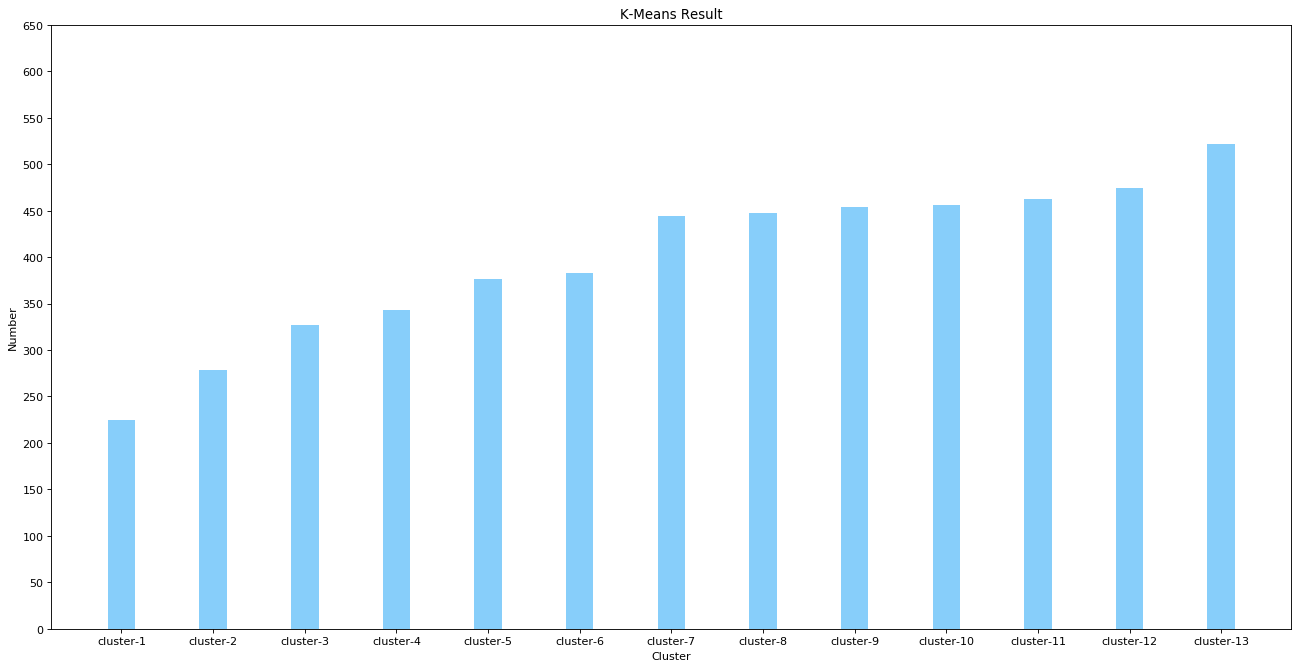

In [68]:
plt.figure(figsize=(20, 10), dpi=80)  # set fig
plt.subplot(1, 1, 1)                 # set the plot size
N = 13                               # bar numbers 

number=[np.sum(cluster_labels == 0), np.sum(cluster_labels == 1),np.sum(cluster_labels == 2),
         np.sum(cluster_labels == 3),np.sum(cluster_labels == 4),np.sum(cluster_labels == 5),
         np.sum(cluster_labels == 6),np.sum(cluster_labels == 7),np.sum(cluster_labels == 8),
         np.sum(cluster_labels == 9),np.sum(cluster_labels == 10),np.sum(cluster_labels == 11),np.sum(cluster_labels == 12)]
number.sort()

values = (number[0],number[1],number[2],number[3],number[4],number[5],
          number[6],number[7],number[8],number[9],number[10],number[11],number[12]
         ) # set values for dirrerent bars

index = np.arange(N)                                                # num of each bar
width = 0.3                                                         # width of the bar
p2 = plt.bar(index, values, width, label="--", color="#87CEFA")     # plot set the color

plt.xlabel('Cluster')                               # set xlabel
plt.ylabel('Number')                                # set ylabel
plt.title('K-Means Result')                         # set title
plt.xticks(index, ('cluster-1', 'cluster-2','cluster-3','cluster-4','cluster-5','cluster-6','cluster-7',
                  'cluster-8','cluster-9','cluster-10','cluster-11','cluster-12','cluster-13',))       # set the name of each bar
plt.yticks(np.arange(0, 700, 50))                   # from 0~35000(50000 for each separate)
#plt.legend(loc="upper right")
plt.show()                                          #show

# AgglomerativeClustering

In [69]:
from sklearn.cluster import AgglomerativeClustering #use AgglomerativeClustering

ward=AgglomerativeClustering(n_clusters=13,linkage="ward", affinity="euclidean").fit(matrix) 
#use AgglomerativeClustering to cluster the data in 13 clusters
label = ward.labels_ #cal the label

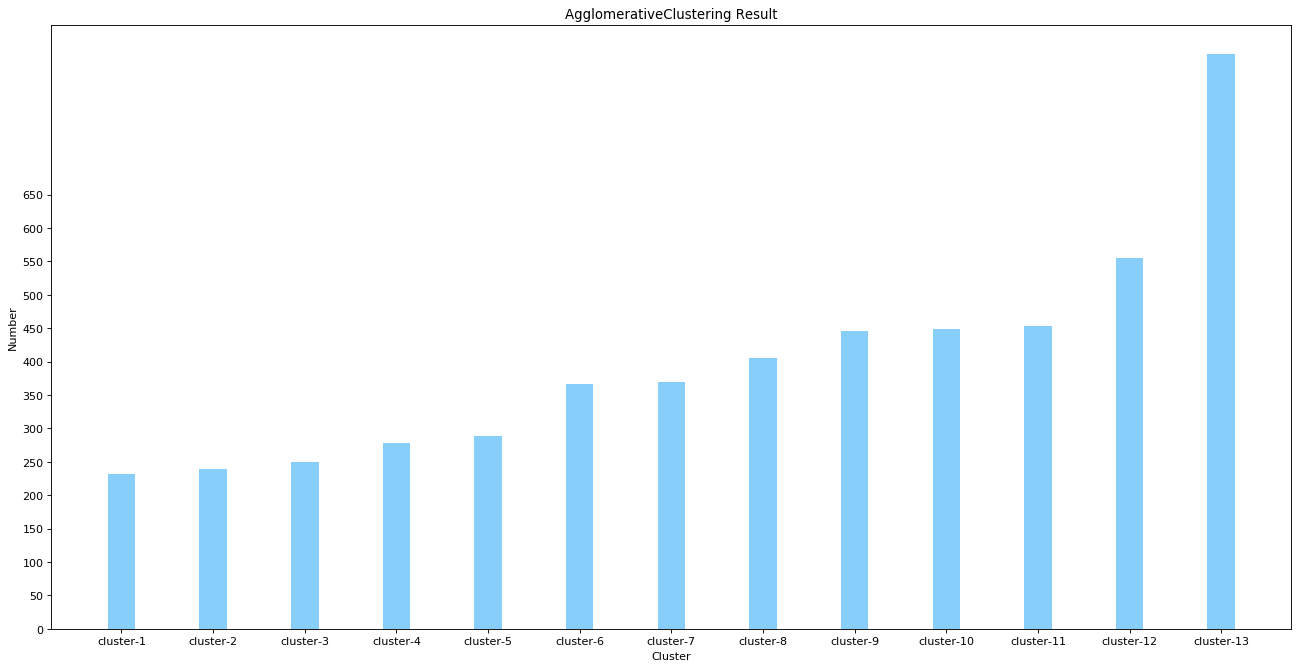

In [73]:
plt.figure(figsize=(20, 10), dpi=80)  # set fig
plt.subplot(1, 1, 1)                 # set the plot size
N = 13                               # bar numbers 

number1=[np.sum(label == 0), np.sum(label == 1),np.sum(label == 2),
         np.sum(label == 3),np.sum(label == 4),np.sum(label == 5),
         np.sum(label == 6),np.sum(label == 7),np.sum(label == 8),
         np.sum(label == 9),np.sum(label == 10),np.sum(label == 11),np.sum(label == 12)]
number1.sort()

values = (number1[0],number1[1],number1[2],number1[3],number1[4],number1[5],
          number1[6],number1[7],number1[8],number1[9],number1[10],number1[11],number1[12]
         ) # set values for dirrerent bars


index = np.arange(N)                                                # num of each bar
width = 0.3                                                         # width of the bar
p2 = plt.bar(index, values, width, label="--", color="#87CEFA")     # plot set the color

plt.xlabel('Cluster')                                               # set xlabel
plt.ylabel('Number')                                                # set ylabel
plt.title('AgglomerativeClustering Result')                         # set title
plt.xticks(index, ('cluster-1', 'cluster-2','cluster-3','cluster-4','cluster-5','cluster-6','cluster-7',
                  'cluster-8','cluster-9','cluster-10','cluster-11','cluster-12','cluster-13',))       # set the name of each bar
plt.yticks(np.arange(0, 700, 50))                   # from 0~35000(50000 for each separate)
plt.show()     #show

In [81]:
print('HW1 Clustering Creativity Dataset')
print ('')
print('K-Means')
print(number)
print("AgglomerativeClustering")
print(number1)

HW1 Clustering Creativity Dataset

K-Means
[225, 278, 327, 343, 376, 383, 444, 447, 454, 456, 462, 474, 522]
AgglomerativeClustering
[231, 239, 249, 278, 289, 366, 370, 406, 446, 448, 453, 555, 861]
